In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
%matplotlib inline
import statistics
import seaborn as sns

1.Загрузить файл hr.csv.

In [30]:
hr = pd.read_csv('HR.csv')
hr = hr.rename(columns={"sales":"department"})
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [31]:
hr['dep_code'] = hr['department']
hr['sal_code'] = hr['salary']
hr['sal_code'] = hr['sal_code'].replace({'low': 1, 'medium': 2, 'high': 3})
hr['dep_code'] = pd.factorize(hr.dep_code)[0] + 1
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,dep_code,sal_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1
5,0.41,0.50,2,153,3,0,1,0,sales,low,1,1
6,0.10,0.77,6,247,4,0,1,0,sales,low,1,1
7,0.92,0.85,5,259,5,0,1,0,sales,low,1,1
8,0.89,1.00,5,224,5,0,1,0,sales,low,1,1
9,0.42,0.53,2,142,3,0,1,0,sales,low,1,1


2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [32]:
hr.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dep_code,sal_code
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02,4.34,1.59
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14,2.82,0.64
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,1.00,1.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,1.00,1.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00,4.00,2.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00,7.00,2.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00,10.00,3.00


In [33]:
hr_mean = dict(hr.mean(axis = 0).round(2))
hr_mean

{'satisfaction_level': 0.61,
 'last_evaluation': 0.72,
 'number_project': 3.8,
 'average_montly_hours': 201.05,
 'time_spend_company': 3.5,
 'Work_accident': 0.14,
 'left': 0.24,
 'promotion_last_5years': 0.02,
 'dep_code': 4.34,
 'sal_code': 1.59}

In [34]:
hr_median = dict(hr.median(axis = 0).round(2))
hr_median

{'satisfaction_level': 0.64,
 'last_evaluation': 0.72,
 'number_project': 4.0,
 'average_montly_hours': 200.0,
 'time_spend_company': 3.0,
 'Work_accident': 0.0,
 'left': 0.0,
 'promotion_last_5years': 0.0,
 'dep_code': 4.0,
 'sal_code': 2.0}

In [35]:
hr_mode = hr.mode()
hr_mode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,dep_code,sal_code
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low,1.0,1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В 3-й колонке два одинаково часто встречающихся значения, что также становится известно, если использовать statistics.mode

In [36]:
hr_min = dict(hr.min())
hr_min

{'satisfaction_level': 0.09,
 'last_evaluation': 0.36,
 'number_project': 2,
 'average_montly_hours': 96,
 'time_spend_company': 2,
 'Work_accident': 0,
 'left': 0,
 'promotion_last_5years': 0,
 'department': 'IT',
 'salary': 'high',
 'dep_code': 1,
 'sal_code': 1}

In [37]:
hr_max = dict(hr.max())
hr_max

{'satisfaction_level': 1.0,
 'last_evaluation': 1.0,
 'number_project': 7,
 'average_montly_hours': 310,
 'time_spend_company': 10,
 'Work_accident': 1,
 'left': 1,
 'promotion_last_5years': 1,
 'department': 'technical',
 'salary': 'medium',
 'dep_code': 10,
 'sal_code': 3}

In [38]:
hr_std = dict(hr.std(axis = 0).round(2))
hr_std

{'satisfaction_level': 0.25,
 'last_evaluation': 0.17,
 'number_project': 1.23,
 'average_montly_hours': 49.94,
 'time_spend_company': 1.46,
 'Work_accident': 0.35,
 'left': 0.43,
 'promotion_last_5years': 0.14,
 'dep_code': 2.82,
 'sal_code': 0.64}

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [39]:
hr_corr = hr.corr(method = 'pearson').round(2)
hr_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dep_code,sal_code
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03,0.02,0.05
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01,0.01,-0.00
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00,-0.00,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07,-0.00,0.05
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04,0.02,0.01
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06,-0.04,-0.16
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00,0.02,0.10
dep_code,0.02,0.01,0.01,-0.00,-0.00,0.02,-0.04,0.02,1.00,0.03
sal_code,0.05,-0.01,-0.00,-0.00,0.05,0.01,-0.16,0.10,0.03,1.00


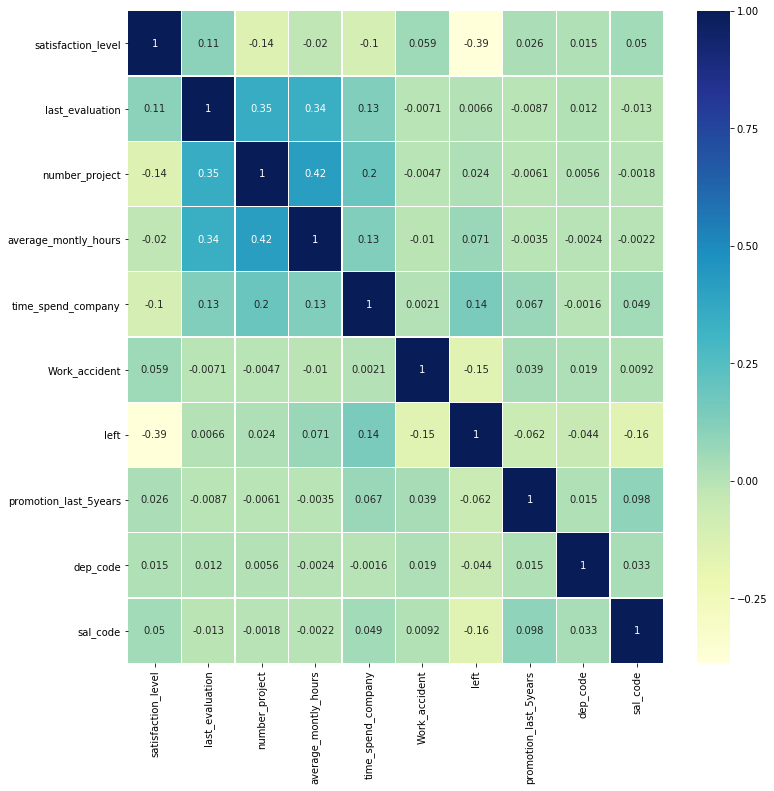

In [40]:
sns.heatmap(hr.corr(),annot=True,cmap='YlGnBu',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

4.Визуализировать несколько взаимосвязей между переменными.

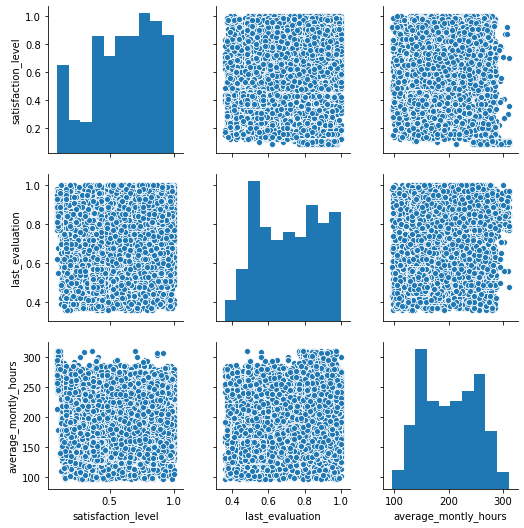

In [41]:
sns_plot = sns.pairplot(
    hr[['satisfaction_level', 'last_evaluation','average_montly_hours']])
sns_plot

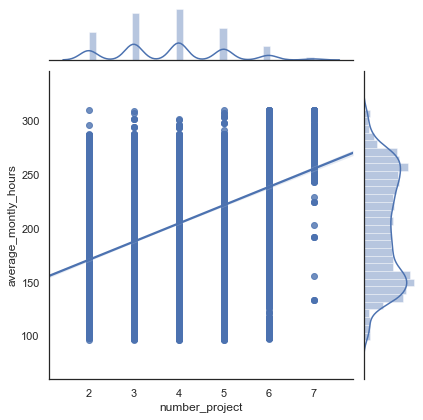

In [68]:
number_proj = hr['number_project']
hours = hr['average_montly_hours']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=number_proj, y=hours, data=hr, kind='reg')
plt.show()

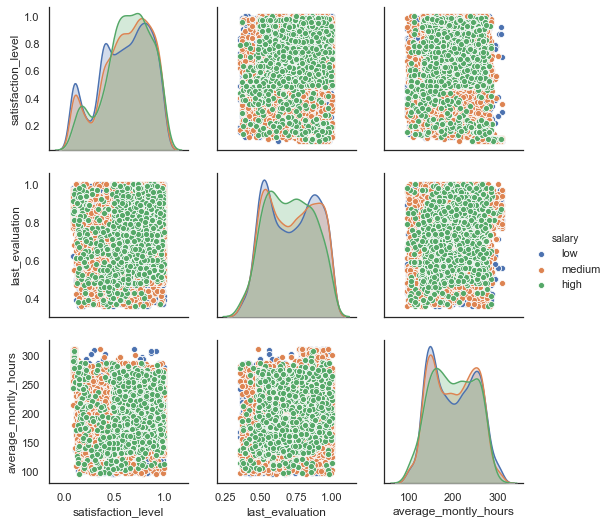

In [44]:
hr2 = hr[['satisfaction_level', 'last_evaluation','average_montly_hours', 'salary']]
fig = sns.pairplot(data=hr2, hue='salary')
plt.show()

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [45]:
salary_low = hr[hr['sal_code']==1]['left']
stats.ttest_1samp(salary_low, hr['left'].mean())

Ttest_1sampResult(statistic=11.007411787730103, pvalue=5.828800133014715e-28)

In [46]:
no_promotion = hr[hr['promotion_last_5years']==0]['left']
stats.ttest_1samp(no_promotion, hr['left'].mean())

Ttest_1sampResult(statistic=1.0974486038445759, pvalue=0.27246333840939135)

In [47]:
salary_low = hr[hr['sal_code']==1]['satisfaction_level']
salary_medium = hr[hr['sal_code']==2]['satisfaction_level']
salary_high = hr[hr['sal_code']==3]['satisfaction_level']
stats.f_oneway(salary_low, salary_medium, salary_high)

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

In [48]:
project_2 = hr[hr['number_project']==2]['left']
project_7 = hr[hr['number_project']==7]['left']
stats.ttest_ind(project_2, project_7)

Ttest_indResult(statistic=-11.576912323308742, pvalue=2.863276824658733e-30)

6.Рассчитать сколько работников работает в каждом департаменте.

In [49]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

7.Показать распределение сотрудников по зарплатам.

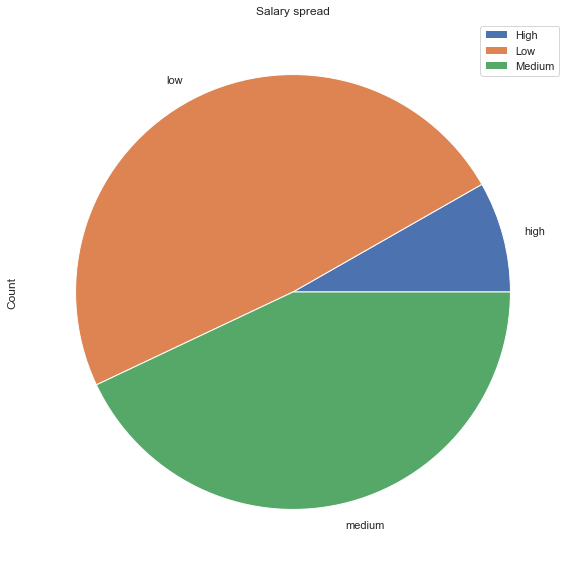

In [50]:
sal = hr.groupby('salary').count()[['left']]
sal.plot(figsize=(10, 10), kind='pie', y='left')
plt.title('Salary spread')
plt.ylabel('Count')
plt.legend(['High', 'Low', 'Medium'])

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [51]:
sal_dep = hr.groupby(['salary', 'department']).count()[['left']].unstack()
sal_dep

left                                                               \
department   IT RandD accounting   hr management marketing product_mng sales   
salary                                                                         
high         83    51         74   45        225        80          68   269   
low         609   364        358  335        180       402         451  2099   
medium      535   372        335  359        225       376         383  1772   

                              
department support technical  
salary                        
high           141       201  
low           1146      1372  
medium         942      1147

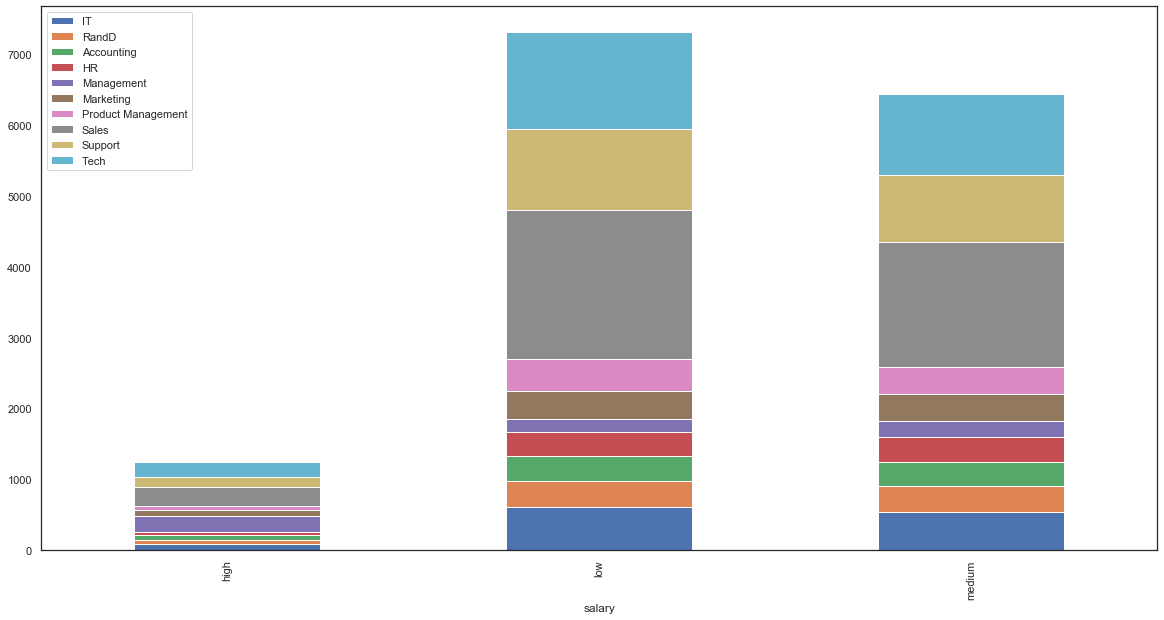

In [52]:
sal_dep.plot.bar(figsize=(20,10), stacked=True)
plt.legend(['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing', 'Product Management', 'Sales', 'Support', 'Tech'])

9.Сколько сотрудников покинули компанию.

In [53]:
hr.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,dep_code,sal_code
left,,,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571


10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Гипотеза № 1: Сотрудники покидают компанию после инцидентов
H0: Число работников, покинувших компанию, связано с числом работников, с которыми произошли инциденты

In [54]:
hr.groupby('Work_accident').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,department,salary,dep_code,sal_code
Work_accident,,,,,,,,,,,
0,12830,12830,12830,12830,12830,12830,12830,12830,12830,12830,12830
1,2169,2169,2169,2169,2169,2169,2169,2169,2169,2169,2169


In [55]:
accidents = hr[hr['Work_accident']==1]['left']
stats.ttest_1samp(accidents, hr['left'].mean())

Ttest_1sampResult(statistic=-27.822899463529684, pvalue=6.090238970805489e-146)

p-value стремится к 0, что указывает на статистическое различие между работниками, вовлечёнными в происшествие, 
которые покинули компанию, и генеральной совокупностью работников, покинувших компанию.

In [ ]:
Гипотеза № 2: Сотрудники покидают компании в связи с отсутствием перспективы роста
H0: Число работников, покинувших компанию, связано с числом работников, не получивших повышение

In [56]:
no_promotion = hr[hr['promotion_last_5years']==0]['left']
stats.ttest_1samp(no_promotion, hr['left'].mean())

Ttest_1sampResult(statistic=1.0974486038445759, pvalue=0.27246333840939135)

Становится интереснее, p-значение выше 5%, значит взаимосвязь есть. 
Однако, не будем делать преждевременных выводов. 
С учётом наличия в представленном датасете категории работников, которые получили повышение за последние 5 лет, предположим, что 5 лет - это первый рубеж для повышения работника (вполне нормально для больших организаций и государственных учреждений).

In [57]:
'''На не самой удобной для прочтения таблице (я учусь, честно) ниже мы можем увидеть что большая часть работников, 
которые не получили повышение и уволились, не проработали больше 3 лет'''
table1 = hr.groupby(['promotion_last_5years','left', 'time_spend_company']).count()[['salary']].unstack()
table1

salary                                       \
time_spend_company              2       3       4      5      6      7    
promotion_last_5years left                                                
0                     0     3137.0  4738.0  1635.0  624.0  492.0  152.0   
                      1       53.0  1571.0   887.0  832.0  209.0    NaN   
1                     0       54.0   119.0    32.0   16.0   17.0   36.0   
                      1        NaN    15.0     3.0    1.0    NaN    NaN   

                                          
time_spend_company             8      10  
promotion_last_5years left                
0                     0     152.0  198.0  
                      1       NaN    NaN  
1                     0      10.0   16.0  
                      1       NaN    NaN

Гипотеза № 3: Сотрудники покидают компанию в связи с низкой заработной платой
1. Н0: Число работников, покинувших компанию, связано с числом работников, получающих низкую заработную плату
2. Н0: Число работников, покинувших компанию, связано с числом работников, получающих среднюю заработную плату
3. Н0: Число работников, покинувших компанию, связано с числом работников, получающих высокую заработную плату

In [64]:
salary_low = hr[hr['sal_code']==1]['left']
stats.ttest_1samp(salary_low, hr['left'].mean())

Ttest_1sampResult(statistic=11.007411787730103, pvalue=5.828800133014715e-28)

In [65]:
salary_medium = hr[hr['sal_code']==2]['left']
stats.ttest_1samp(salary_medium, hr['left'].mean())

Ttest_1sampResult(statistic=-6.723893763788389, pvalue=1.9212429284881062e-11)

In [67]:
salary_high = hr[hr['sal_code']==3]['left']
stats.ttest_1samp(salary_high, hr['left'].mean())

Ttest_1sampResult(statistic=-24.276540966377706, pvalue=9.037033991499458e-107)

In [ ]:
Во всех трёх случаях p стремится к 0, а значит мы отвергаем нулевую гипотезу.